<a href="https://colab.research.google.com/github/ParthDhore/IDS_Ensemble/blob/main/isaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/isaadata/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df.shape

(494021, 43)

Text(0.5, 1.0, 'Count of Different Targets')

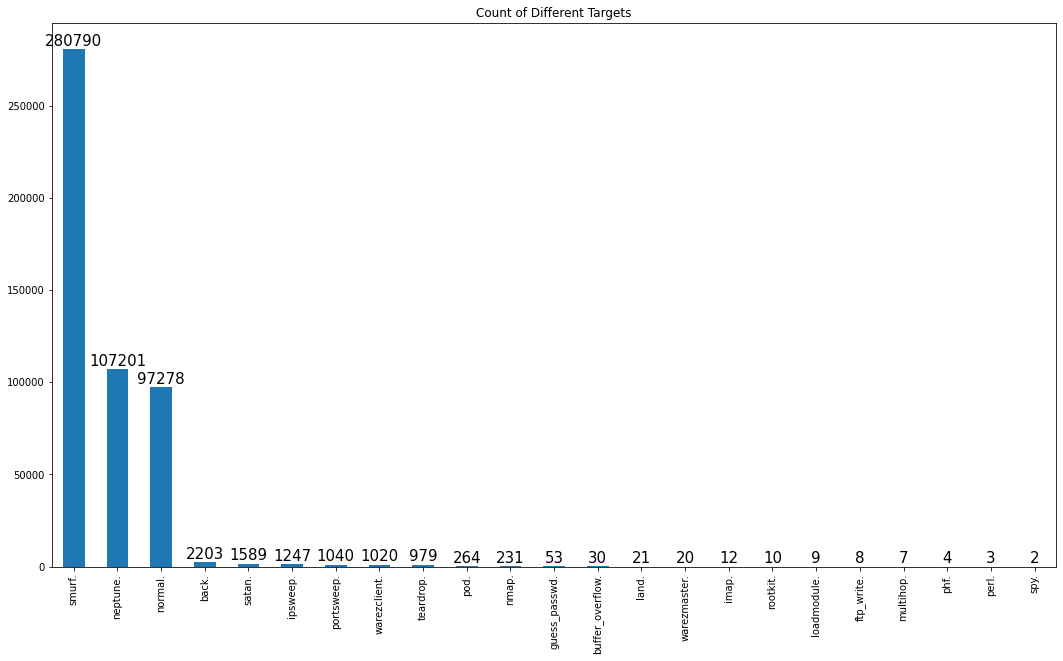

In [ ]:
plt.figure(figsize=(18,10))
plots = df['target'].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Count of Different Targets")

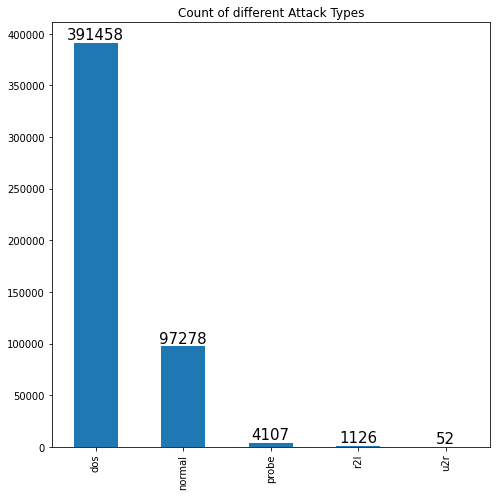

In [ ]:
plt.figure(figsize=(7,7))
plots = df['Attack Type'].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Count of different Attack Types")
plt.tight_layout()

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Here, we can see that the dataset has 5 categorical attributes in total.
protocol_type, flag, service, target, AttackType


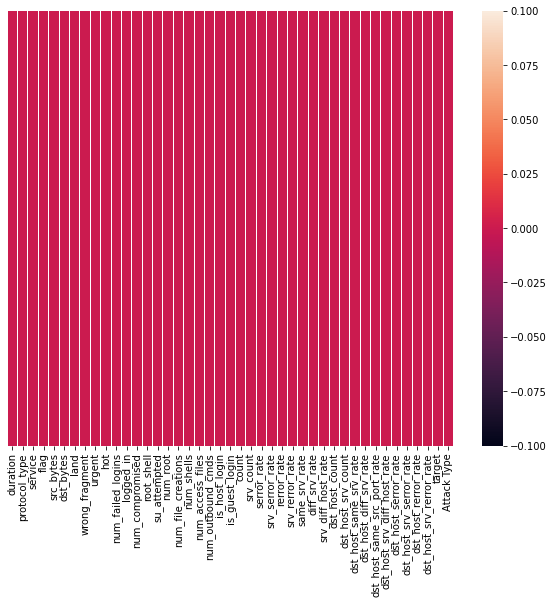

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False)

This shows that no null values are present in the dataset.



**Data Preprocessing**

CATEGORICAL FEATURES DISTRIBUTION

Text(0.5, 0.98, 'Analysing the categorical attributes')

<Figure size 1080x576 with 0 Axes>

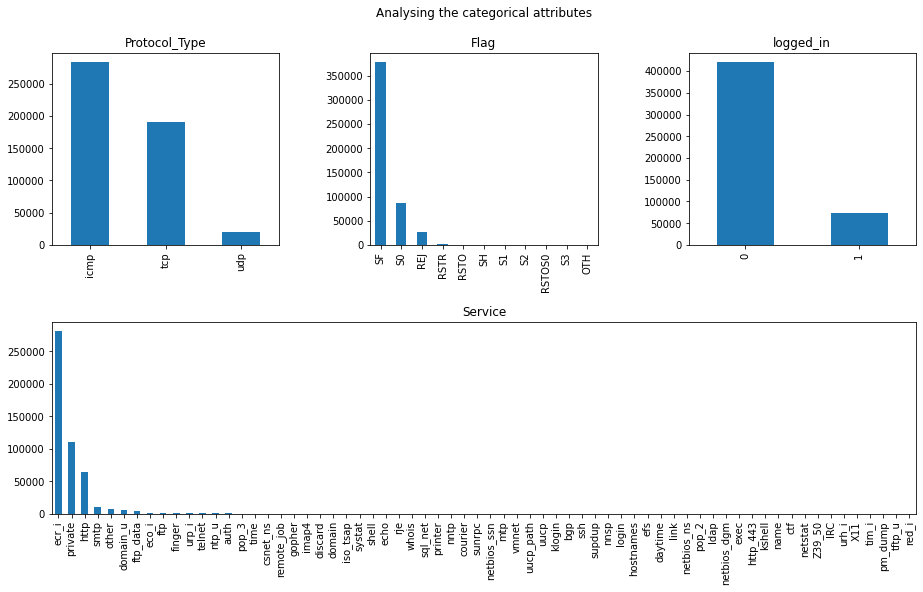

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

plt.figure(figsize = (15,8))
fig, axs = plt.subplots(ncols=2, nrows=2,figsize = (15,8))
gs = axs[1, 0].get_gridspec()
plt.subplot(2,3,1)
bar_graph('protocol_type')
plt.title('Protocol_Type')
plt.subplot(2,3,2)
bar_graph('flag')
plt.title('Flag')
plt.subplot(2,3,3)
bar_graph('logged_in')
plt.title('logged_in')
for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])
bar_graph('service')
plt.title('Service')
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("Analysing the categorical attributes")

TARGET FEATURE DISTRIBUTION

Text(0.5, 1.0, 'Attack Type')

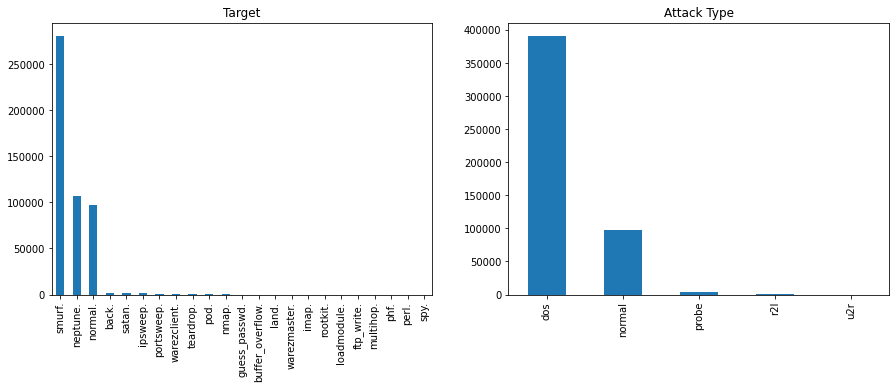

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
bar_graph('target')
plt.title('Target')
plt.subplot(1,2,2)
bar_graph('Attack Type')
plt.title('Attack Type')

Attack Type(The attack types grouped by attack, it's what we will predict)


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

**DATA CORRELATION**

Feature Selection using correlation

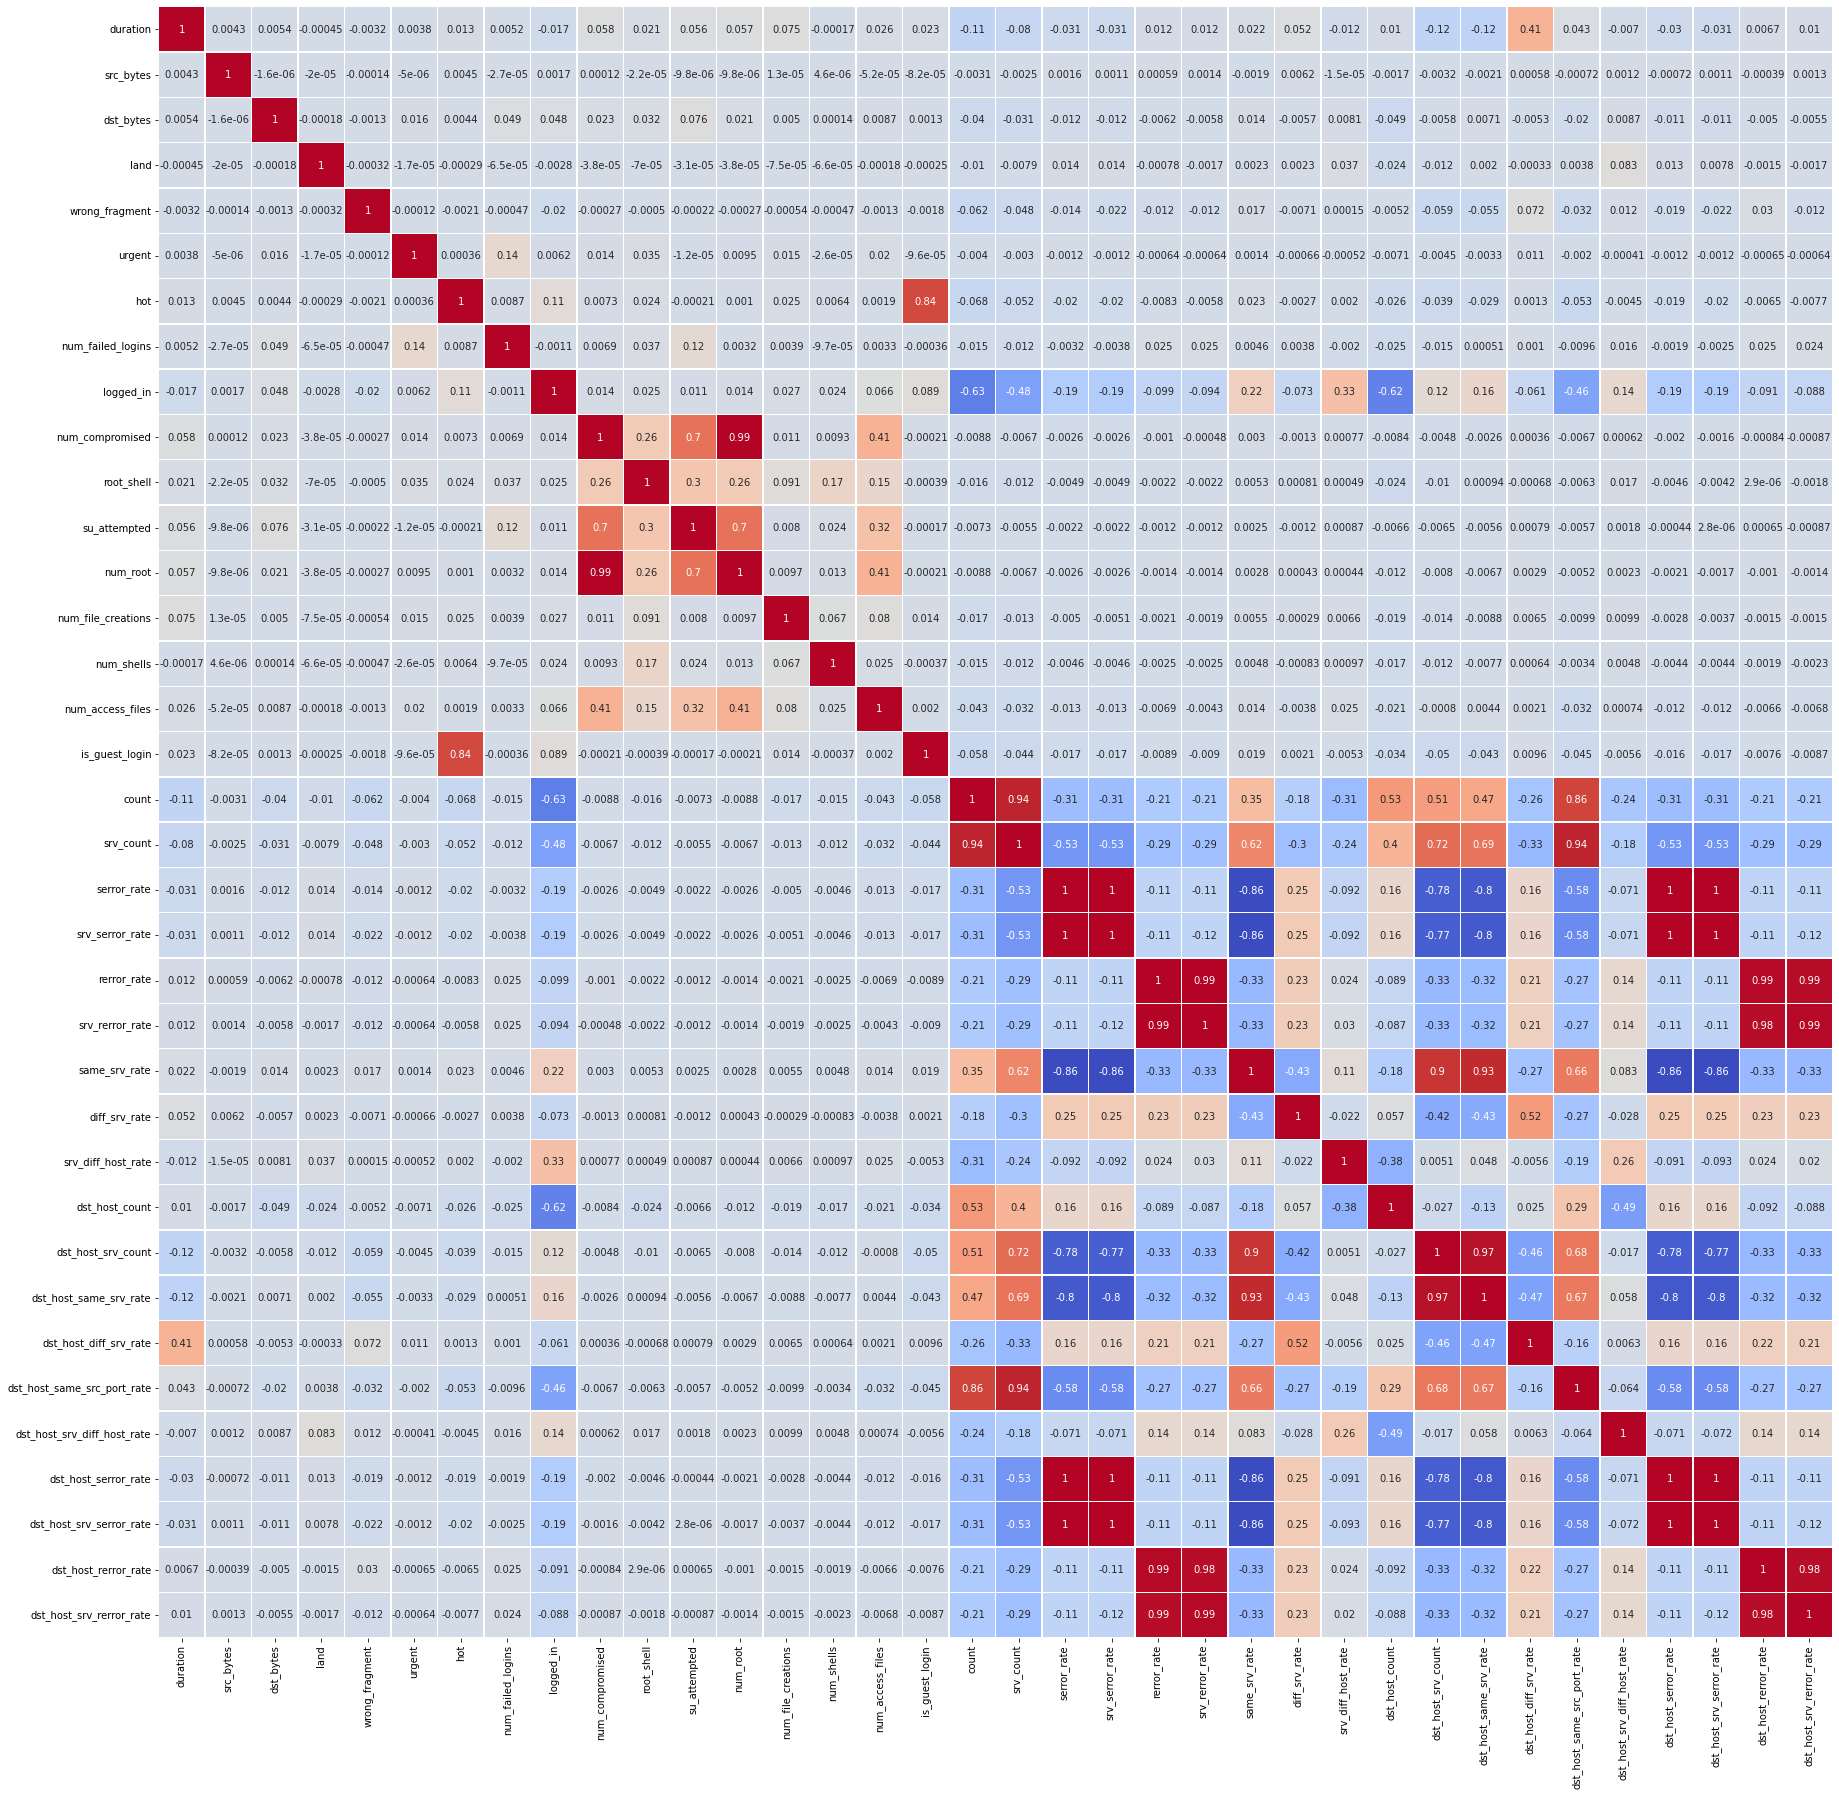

In [ ]:
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidths=.5, cbar=False)
plt.show()

FEATURE SELECTION

In [ ]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [ ]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [ ]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [ ]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [ ]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [ ]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [ ]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [ ]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [ ]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [ ]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [ ]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

In [ ]:
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
df.shape

(494021, 33)

In [ ]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING

In [ ]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.drop('service',axis = 1,inplace= True)

SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

# sc = MinMaxScaler()
# X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')

**Tree based feature selection and random forest classification**

Feature ranking:
1. feature 18 (0.228408)-count
2. feature 4 (0.173746)-dst_bytes
3. feature 10 (0.110278)-logged_in
4. feature 25 (0.086699)-dst_host_count
5. feature 29 (0.052252)-dst_host_srv_diff_host_rate
6. feature 22 (0.043789)-same_srv_rate
7. feature 28 (0.043484)-dst_host_same_src_port_rate
8. feature 3 (0.042441)-src_bytes
9. feature 1 (0.039632)-protocol_type
10. feature 19 (0.034304)-srv_count
11. feature 23 (0.034230)-diff_srv_rate
12. feature 27 (0.023119)-dst_host_diff_srv_rate
13. feature 26 (0.018889)-dst_host_srv_count
14. feature 24 (0.017107)-srv_diff_host_rate
15. feature 2 (0.009814)-flag
16. feature 20 (0.009270)-serror_rate
17. feature 0 (0.008077)-duration
18. feature 11 (0.007941)-num_compromised
19. feature 8 (0.007564)-hot
20. feature 6 (0.004742)-wrong_fragment
21. feature 21 (0.003089)-rerror_rate
22. feature 17 (0.000712)-is_guest_login
23. feature 9 (0.000174)-num_failed_logins
24. feature 12 (0.000064)-root_shell
25. feature 14 (0.000054)-num_file_crea

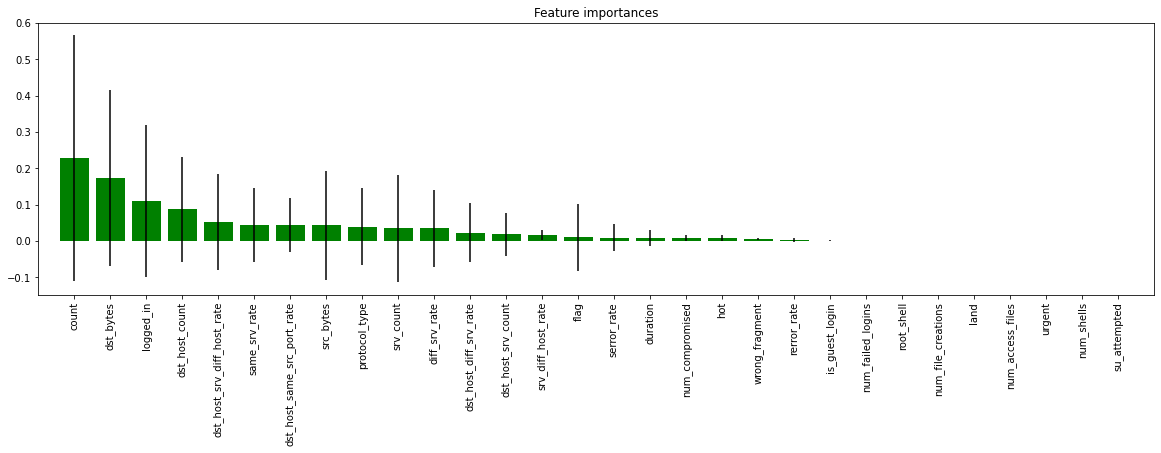

In [ ]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,Y_train)

clf_rf_1 = RandomForestClassifier()      
clr_rf_1 = clf_rf_1.fit(X_train,Y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),end='-')
    print(X_train.columns[indices[f]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.show()

In [ ]:
X_train.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score
        
test_accuracies = []
t = X_train
t_2 = X_test

to_be_removed = []
for f in range(30):
    to_be_removed.append(X_train.columns[indices[f]])

for i in range(30,0,-1):
    clf_rf = RandomForestClassifier(random_state=43) 
    clr_rf = clf_rf.fit(t,Y_train)
    test_ac = accuracy_score(Y_test,clf_rf.predict(t_2))
    test_accuracies.append(test_ac)
    t = t.drop(to_be_removed[i-1],axis=1)
    t_2 = t_2.drop(to_be_removed[i-1],axis=1)

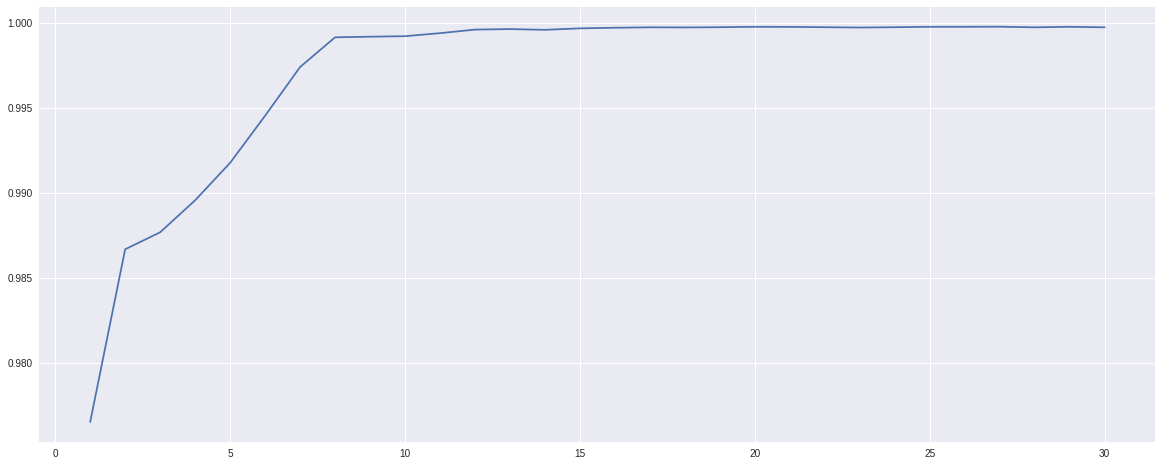

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(20,8))
x_place = [30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
plt.plot(x_place,test_accuracies)
plt.show()

In [ ]:
for i in range(29,-1,-1):
    print(str(i+1)+" - "+str(test_accuracies[29-i]))

30 - 0.9997362400093236
29 - 0.9997669097756813
28 - 0.9997362400093236
27 - 0.9997730437289529
26 - 0.9997669097756813
25 - 0.9997669097756813
24 - 0.9997423739625951
23 - 0.9997239721027805
22 - 0.9997423739625951
21 - 0.9997607758224097
20 - 0.9997669097756813
19 - 0.9997423739625951
18 - 0.9997301060560521
17 - 0.9997362400093236
16 - 0.9997117041962374
15 - 0.9996749004766081
14 - 0.9995890251308066
13 - 0.9996319628037074
12 - 0.9996012930373497
11 - 0.9993927386261171
10 - 0.9992148539812423
9 - 0.9991841842148846
8 - 0.9991473804952554
7 - 0.9973992038128654
6 - 0.9945346476350543
5 - 0.9917621007563164
4 - 0.9895600115318322
3 - 0.9876768878774681
2 - 0.9866770534942065
1 - 0.9765130929232582


We can see that after around using 16 features that accuracy of the system changes very little, so we will use those 16 features

In [ ]:
X_train = X_train.drop(['hot','num_compromised','duration','wrong_fragment','rerror_rate','is_guest_login','num_failed_logins',
                        'root_shell','num_file_creations','num_access_files','land','num_shells','urgent','su_attempted',]
                       ,axis=1)
X_test = X_test.drop(['hot','num_compromised','duration','wrong_fragment','rerror_rate','is_guest_login','num_failed_logins',
                        'root_shell','num_file_creations','num_access_files','land','num_shells','urgent','su_attempted',]
                       ,axis=1)

**Modeling**

In [ ]:
acc_train = []
acc_test = []
pres_train = []
pres_test = []
rec_train = []
rec_test = []
f1_train = []
f1_test = []
train_time = []
test_time = []
confusion_matrixs = []

In [ ]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(X_train,Y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(X_train)
  end_time = time.time()
  train_time_model = end_time-start_time
  train_time.append(train_time_model)

  start_time = time.time()
  pred_test = model.predict(X_test)
  end_time = time.time()
  test_time_model = end_time-start_time
  test_time.append(test_time_model)
  
  #Print accuracy
  ac_train = accuracy_score(Y_train,pred_train)
  ac_test = accuracy_score(Y_test,pred_test)
  acc_train.append(ac_train)
  acc_test.append(ac_test)
  

  #Print precision
  pr_train = precision_score(Y_train, pred_train,average="micro")
  pr_test = precision_score(Y_test, pred_test,average="micro")
  pres_train.append(pr_train)
  pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(Y_train, pred_train,average="micro")
  re_test = recall_score(Y_test, pred_test,average="micro")
  rec_train.append(re_train)
  rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(Y_train, pred_train,average="micro")
  f_test = f1_score(Y_test, pred_test,average="micro")
  f1_train.append(f_train)
  f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(Y_test,pred_test) 
  confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_name = ['Gaussian NaiveBayes','Decision Tree','RandomForest','SVM','LogisticRegression','GradientBoosting']
model1 = GaussianNB()
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model3 = RandomForestClassifier(n_estimators=30)
model4 = SVC(gamma = 'scale')
model5 = LogisticRegression(max_iter=1200000)
model6 = GradientBoostingClassifier(random_state=0)
models = [model1,model2,model3,model4,model5,model6]

In [ ]:
classification_model_report(models[0],model_name[0],0)

In [ ]:
classification_model_report(models[1],model_name[1],0)

In [ ]:
classification_model_report(models[2],model_name[2],0)

In [ ]:
classification_model_report(models[3],model_name[3],0)

In [ ]:
classification_model_report(models[4],model_name[4],0)

In [ ]:
classification_model_report(models[5],model_name[5],0)

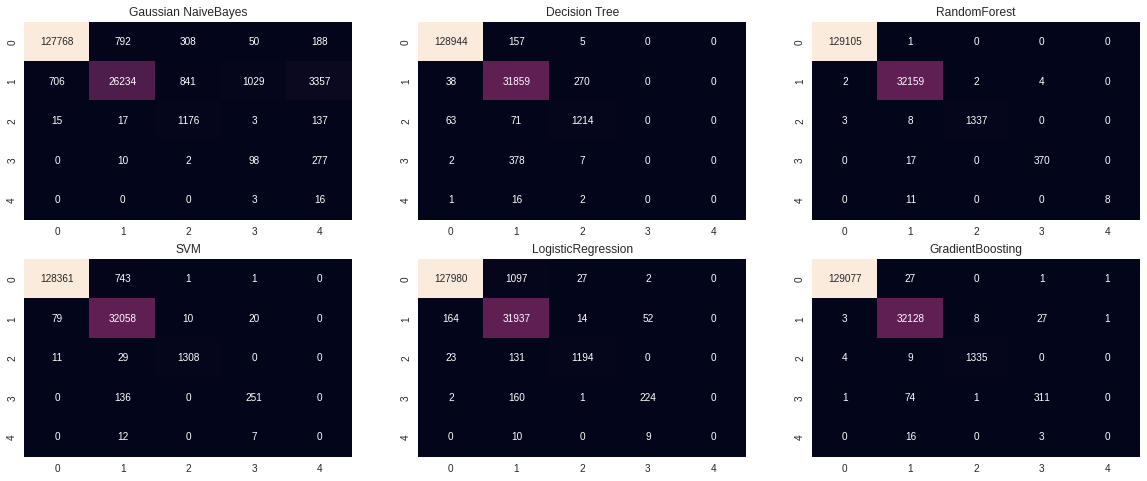

In [ ]:
plt.subplots(ncols=3, nrows=2,figsize=(20,8),sharey=True,sharex=True)
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.heatmap(confusion_matrixs[i-1],annot=True,fmt="d",cbar=False)
    plt.title(model_name[i-1])

In [ ]:
for i in range(len(model_name)):
    print(model_name[i]+" : "+str(acc_test[i]*100))

Gaussian NaiveBayes : 95.25538714446074
Decision Tree : 99.38047071957405
RandomForest : 99.9705570242966
SVM : 99.35654830181504
LogisticRegression : 98.96213510645477
GradientBoosting : 99.89204242242083


In [ ]:
print(acc_train)
print(pres_train)
print(rec_train)
print(f1_train)

[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]
[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]
[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]
[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]


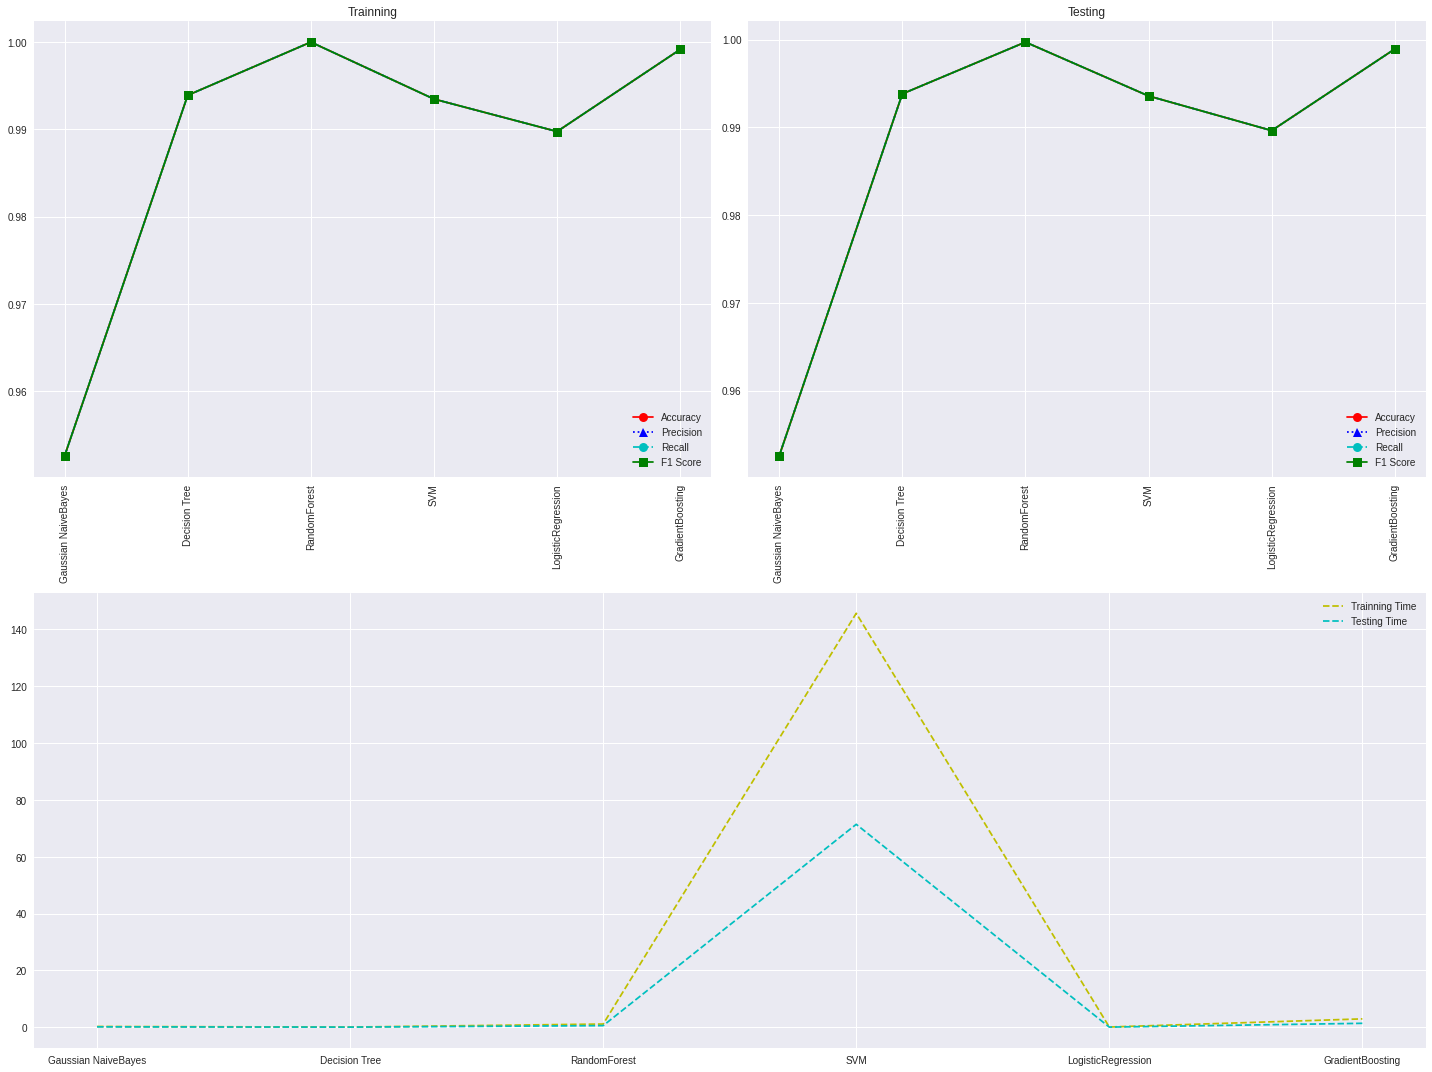

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(model_name,acc_train,'r',marker='o', markersize=9)
plt.plot(model_name,pres_train,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_train,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(model_name,acc_test,'r',marker='o', markersize=9)
plt.plot(model_name,pres_test,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_test,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(model_name,train_time,'y--')
plt.plot(model_name,test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def estimate_creator(l):
    estm = []
    for i in l:
        estm.append((model_name[i],models[i]))
    return estm

In [ ]:
from sklearn.ensemble import StackingClassifier

l = [[0,1,2],[1,2,5],[0,2,5]]

estimator_list = []
for i in range(len(l)):
    estimator_list.append(estimate_creator(l[i]))

# Build stack model
stack_model_list = []
for i in range(len(l)):
    stack_model_list.append(StackingClassifier(estimators=estimator_list[i], final_estimator=LogisticRegression()))

stack_model_name = []
for i in range(len(l)):
    stack_model_name.append(str("Meta Model "+str(i+1)))

In [ ]:
stack_acc_train = []
stack_acc_test = []
stack_pres_train = []
stack_pres_test = []
stack_rec_train = []
stack_rec_test = []
stack_f1_train = []
stack_f1_test = []
stack_train_time = []
stack_test_time = []
stack_confusion_matrixs = []
test_prediction = []
train_prediction = []

In [ ]:
def stack_classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(X_train,Y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(X_train)
  end_time = time.time()
  train_time_model = end_time-start_time
  stack_train_time.append(train_time_model)
  train_prediction.append(pred_train)

  start_time = time.time()
  pred_test = model.predict(X_test)
  end_time = time.time()
  test_time_model = end_time-start_time
  stack_test_time.append(test_time_model)
  test_prediction.append(pred_test)
  
  #Print accuracy
  ac_train = accuracy_score(Y_train,pred_train)
  ac_test = accuracy_score(Y_test,pred_test)
  stack_acc_train.append(ac_train)
  stack_acc_test.append(ac_test)
  
  #Print precision
  pr_train = precision_score(Y_train, pred_train,average="macro")
  pr_test = precision_score(Y_test, pred_test,average="macro")
  stack_pres_train.append(pr_train)
  stack_pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(Y_train, pred_train,average="macro")
  re_test = recall_score(Y_test, pred_test,average="macro")
  stack_rec_train.append(re_train)
  stack_rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(Y_train, pred_train,average="macro")
  f_test = f1_score(Y_test, pred_test,average="macro")
  stack_f1_train.append(f_train)
  stack_f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(Y_test,pred_test) 
  stack_confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [ ]:
stack_classification_model_report(stack_model_list[0],stack_model_name[0],0)

In [ ]:
stack_classification_model_report(stack_model_list[1],stack_model_name[1],0)

In [ ]:
stack_classification_model_report(stack_model_list[2],stack_model_name[2],0)

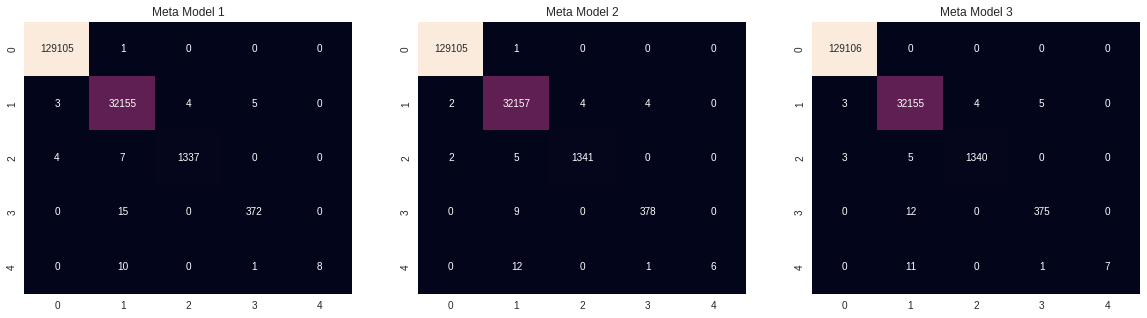

In [ ]:
plt.subplots(ncols=3, nrows=1,figsize=(20,5),sharey=True,sharex=True)
for i in range(len(l)):
    plt.subplot(1,3,i+1)
    sns.heatmap(stack_confusion_matrixs[i],annot=True,fmt="d",cbar=False)
    plt.title(stack_model_name[i])

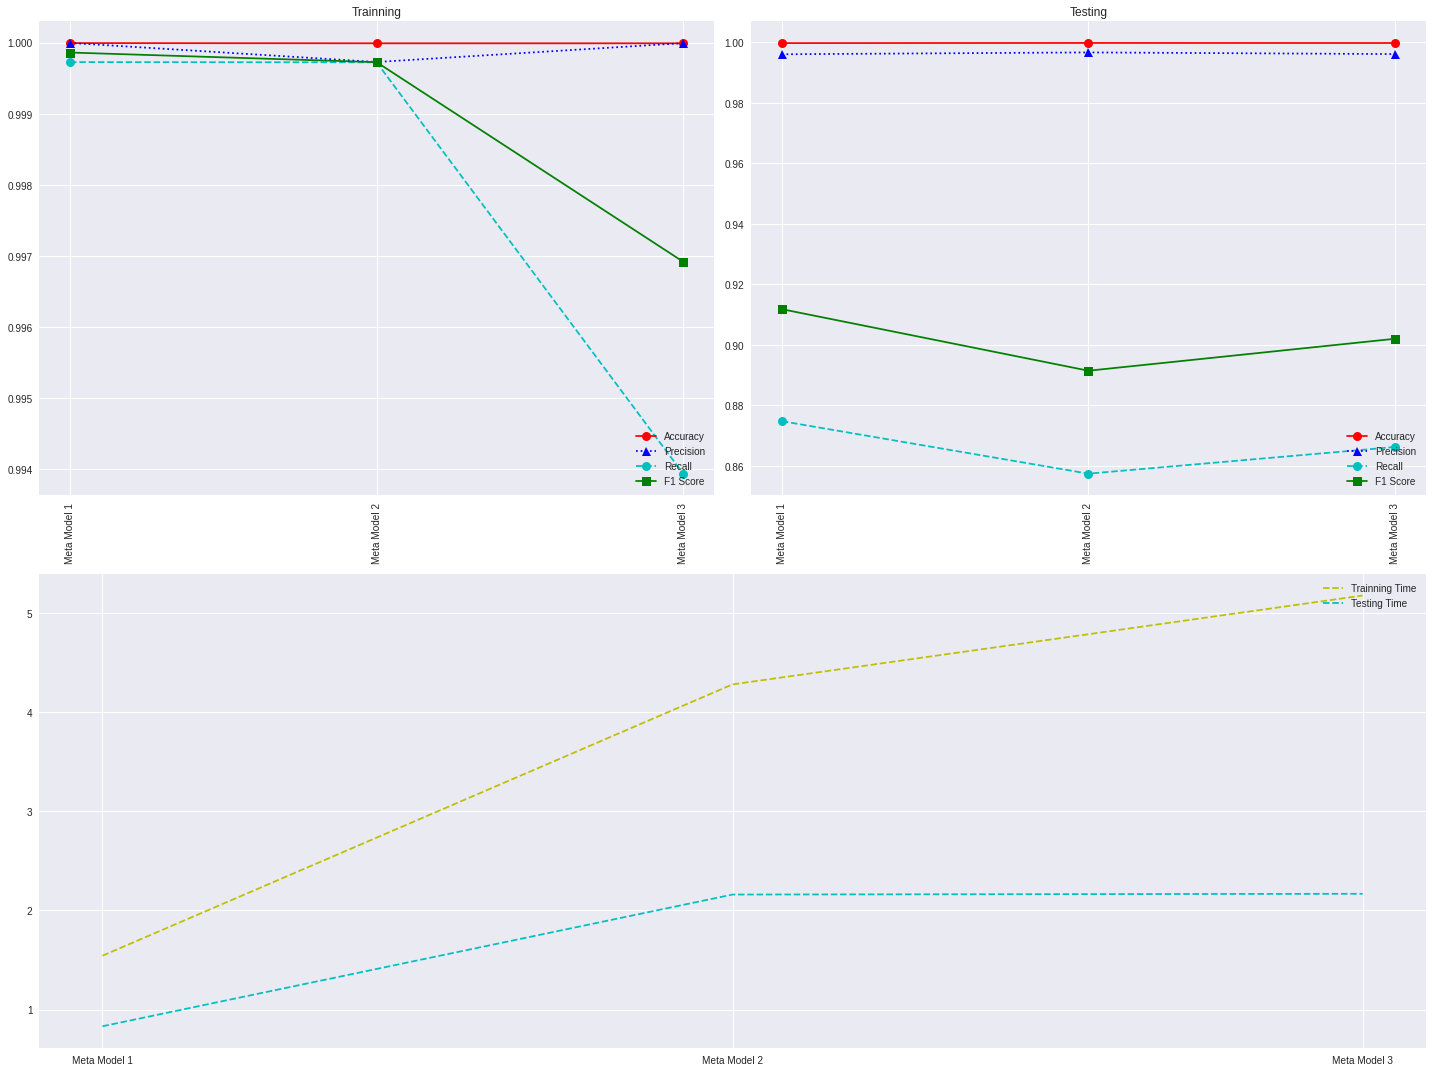

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(stack_model_name,stack_acc_train,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_train,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_train,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(stack_model_name,stack_acc_test,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_test,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_test,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(stack_model_name,stack_train_time,'y--')
plt.plot(stack_model_name,stack_test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(stack_model_name)):
    print(stack_model_name[i]+" : "+str(stack_acc_test[i]*100))

Meta Model 1 : 99.96933023364228
Meta Model 2 : 99.97546418691383
Meta Model 3 : 99.97301060560521


In [ ]:
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = train_prediction[i]

df_ann = pd.DataFrame(creator)
df_ann.head()

,Meta Model 1,Meta Model 2,Meta Model 3
0,normal,normal,normal
1,dos,dos,dos
2,dos,dos,dos
3,normal,normal,normal
4,dos,dos,dos


In [ ]:
pmap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df_ann['Meta Model 1'] = df_ann['Meta Model 1'].map(pmap)
df_ann['Meta Model 2'] = df_ann['Meta Model 2'].map(pmap)
df_ann['Meta Model 3'] = df_ann['Meta Model 3'].map(pmap)

In [ ]:
### Creating dataset for ANN Model
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = test_prediction[i]

df_ann_test = pd.DataFrame(creator)
df_ann_test.head()

,Meta Model 1,Meta Model 2,Meta Model 3
0,dos,dos,dos
1,dos,dos,dos
2,dos,dos,dos
3,normal,normal,normal
4,dos,dos,dos


In [ ]:
pmap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df_ann_test['Meta Model 1'] = df_ann_test['Meta Model 1'].map(pmap)
df_ann_test['Meta Model 2'] = df_ann_test['Meta Model 2'].map(pmap)
df_ann_test['Meta Model 3'] = df_ann_test['Meta Model 3'].map(pmap)

In [ ]:
df_ann_test.head()
# df_ann_test.dtypes

,Meta Model 1,Meta Model 2,Meta Model 3
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(3,input_dim =3,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [ ]:
ann_model = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [ ]:
scaler = StandardScaler()
df_ann = scaler.fit_transform(df_ann)
df_ann_test = scaler.transform(df_ann_test)
ann_model.fit(df_ann, Y_train.values.ravel())

Epoch 1/100
5172/5172 [==============================] - 15s 3ms/step - loss: 0.4192 - accuracy: 0.9520
Epoch 2/100
5172/5172 [==============================] - 14s 3ms/step - loss: 0.0706 - accuracy: 0.9893
Epoch 3/100
5172/5172 [==============================] - 15s 3ms/step - loss: 0.0518 - accuracy: 0.9893
Epoch 4/100
5172/5172 [==============================] - 13s 2ms/step - loss: 0.0488 - accuracy: 0.9893
Epoch 5/100
5172/5172 [==============================] - 13s 3ms/step - loss: 0.0483 - accuracy: 0.9893
Epoch 6/100
5172/5172 [==============================] - 13s 3ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 7/100
5172/5172 [==============================] - 15s 3ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 8/100
5172/5172 [==============================] - 13s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 9/100
5172/5172 [==============================] - 13s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 10/100
5172/5172 [==============================] - 13s 3m

In [ ]:
Y_train_pred = ann_model.predict(df_ann)

10344/10344 [==============================] - 16s 2ms/step


In [ ]:
ann_acc_train = accuracy_score(Y_train,Y_train_pred)

In [ ]:
Y_test_pred = ann_model.predict(df_ann_test)
ann_acc_test = accuracy_score(Y_test,Y_test_pred)

5095/5095 [==============================] - 8s 2ms/step


In [ ]:
ann_pr_train = precision_score(Y_train,Y_train_pred,average="macro")
ann_pr_test = precision_score(Y_test, Y_test_pred,average="macro")

In [ ]:
ann_re_train = recall_score(Y_train,Y_train_pred,average="macro")
ann_re_test = recall_score(Y_test, Y_test_pred,average="macro")

In [ ]:
ann_f_train = f1_score(Y_train, Y_train_pred,average="macro")
ann_f_test = f1_score(Y_test, Y_test_pred,average="macro")

In [ ]:
creator_train = {}
creator_train['Model'] = model_name
creator_train['Accuracy'] = acc_train
creator_train['Precision'] = pres_train
creator_train['Recall'] = rec_train
creator_train['F1 Score'] = f1_train
training_ML_models = pd.DataFrame(creator_train)
training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian NaiveBayes,0.952567,0.952567,0.952567,0.952567
1,Decision Tree,0.993900,0.993900,0.993900,0.993900
2,RandomForest,0.999997,0.999997,0.999997,0.999997
3,SVM,0.993468,0.993468,0.993468,0.993468
4,LogisticRegression,0.989746,0.989746,0.989746,0.989746
5,GradientBoosting,0.999157,0.999157,0.999157,0.999157


In [ ]:
creator_test = {}
creator_test['Model'] = model_name
creator_test['Accuracy'] = acc_test
creator_test['Precision'] = pres_test
creator_test['Recall'] = rec_test
creator_test['F1 Score'] = f1_test
testing_ML_models = pd.DataFrame(creator_test)
testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian NaiveBayes,0.952554,0.952554,0.952554,0.952554
1,Decision Tree,0.993805,0.993805,0.993805,0.993805
2,RandomForest,0.999706,0.999706,0.999706,0.999706
3,SVM,0.993565,0.993565,0.993565,0.993565
4,LogisticRegression,0.989621,0.989621,0.989621,0.989621
5,GradientBoosting,0.998920,0.998920,0.998920,0.998920


In [ ]:
stack_creator_train = {}
stack_creator_train['Model'] = stack_model_name
stack_creator_train['Accuracy'] = stack_acc_train
stack_creator_train['Precision'] = stack_pres_train
stack_creator_train['Recall'] = stack_rec_train
stack_creator_train['F1 Score'] = stack_f1_train
stack_training_ML_models = pd.DataFrame(stack_creator_train)
stack_training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.999994,0.999996,0.999726,0.999861
1,Meta Model 2,0.999991,0.999728,0.999723,0.999726
2,Meta Model 3,0.999991,0.999993,0.993936,0.996918


In [ ]:
stack_creator_test = {}
stack_creator_test['Model'] = stack_model_name
stack_creator_test['Accuracy'] = stack_acc_test
stack_creator_test['Precision'] = stack_pres_test
stack_creator_test['Recall'] = stack_rec_test
stack_creator_test['F1 Score'] = stack_f1_test
stack_testing_ML_models = pd.DataFrame(stack_creator_test)
stack_testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.999693,0.996013,0.874750,0.911767
1,Meta Model 2,0.999755,0.996620,0.857404,0.891428
2,Meta Model 3,0.999730,0.996072,0.866221,0.901984


In [ ]:
ann_creator = {}
ann_creator['ANN'] = ['Trainning','Testing']
ann_creator['Accuracy'] = [ann_acc_train,ann_acc_test]
ann_creator['Precision'] = [ann_pr_train,ann_pr_test]
ann_creator['Recall'] = [ann_re_train,ann_re_test]
ann_creator['F1 Score'] = [ann_f_train,ann_f_test]
ann_models = pd.DataFrame(ann_creator)
ann_models

,ANN,Accuracy,Precision,Recall,F1 Score
0,Trainning,0.989329,0.389711,0.399997,0.394718
1,Testing,0.989229,0.389659,0.399992,0.394689
